## Imports

In [7]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

## Dados

In [ ]:
# Carregando os dados de treino e teste
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

In [4]:
print('Min {}, Max {}'.format(identificacoes_treino.min(), identificacoes_treino.max()))

Min 0, Max 9


In [5]:
total_de_classifcacoes = len(np.unique(identificacoes_treino))
total_de_classifcacoes

10

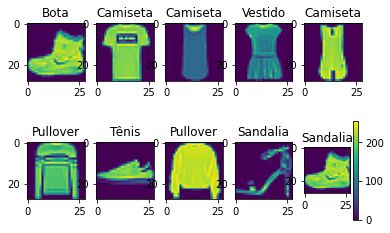

In [8]:
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandalia', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

plt.imshow(imagens_treino[0])
plt.colorbar()

## Criando o modelo

In [9]:
imagens_treino = imagens_treino/255.0 #Dividindo para normalizar e diminuir a perda

modelo = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu), #Função mto utlizada para deeplearning em redes neurais
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ]) #ENTRADA, PROCESSAMENTO E SAÍDA

## Ensinando o modelo

In [10]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
modelo.fit(imagens_treino,identificacoes_treino, validation_split=0.2,epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5019 - accuracy: 0.8238 - val_loss: 0.4239 - val_accuracy: 0.8453
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3761 - accuracy: 0.8639 - val_loss: 0.3606 - val_accuracy: 0.8704
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3337 - accuracy: 0.8772 - val_loss: 0.3384 - val_accuracy: 0.8785
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3131 - accuracy: 0.8846 - val_loss: 0.3423 - val_accuracy: 0.8748
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2947 - accuracy: 0.8904 - val_loss: 0.3336 - val_accuracy: 0.8826


## Testando o modelo

In [12]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[0]))
print('número da imagem de teste:', identificacoes_teste[0])

resultado teste: 9
número da imagem de teste: 9


In [13]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

313/313 [==============================] - 2s 4ms/step - loss: 72.6394 - accuracy: 0.8476


In [14]:
print('perda teste:', np.argmax(perda_teste))
print('acuracia teste:', acuracia_teste)

perda teste: 0
acuracia teste: 0.847599983215332


## Ajustando modelo e Visualizando histórico

In [15]:
historico = modelo.fit(imagens_treino,identificacoes_treino, validation_split=0.2,epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2759 - accuracy: 0.8981 - val_loss: 0.3355 - val_accuracy: 0.8816
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2643 - accuracy: 0.9019 - val_loss: 0.3281 - val_accuracy: 0.8851
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2536 - accuracy: 0.9051 - val_loss: 0.3168 - val_accuracy: 0.8892
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2405 - accuracy: 0.9109 - val_loss: 0.3282 - val_accuracy: 0.8839
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2320 - accuracy: 0.9122 - val_loss: 0.3073 - val_accuracy: 0.8923


In [16]:
historico.history

{'accuracy': [0.898145854473114,
  0.9018958210945129,
  0.9050833582878113,
  0.910895824432373,
  0.9122083187103271],
 'loss': [0.27586668729782104,
  0.26431983709335327,
  0.2535597085952759,
  0.24045169353485107,
  0.2319585531949997],
 'val_accuracy': [0.8815833330154419,
  0.8850833177566528,
  0.8891666531562805,
  0.8839166760444641,
  0.8922500014305115],
 'val_loss': [0.33547326922416687,
  0.32814502716064453,
  0.3167846202850342,
  0.328249454498291,
  0.3072986602783203]}

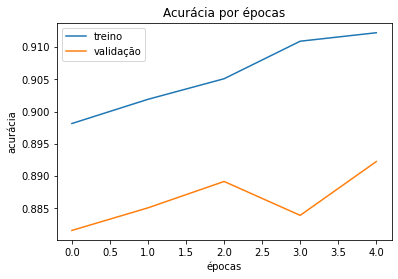

In [17]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

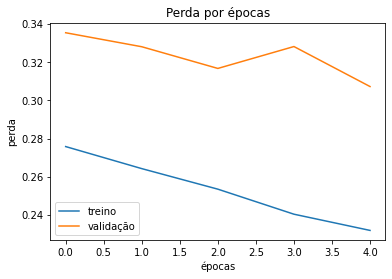

In [18]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [19]:
# MODELO 2
imagens_treino = imagens_treino/255.0

modelo2 = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ]) #ENTRADA, PROCESSAMENTO E SAÍDA
modelo2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico2 = modelo2.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 1.1124 - accuracy: 0.6396 - val_loss: 0.7049 - val_accuracy: 0.7524
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.6661 - accuracy: 0.7594 - val_loss: 0.5943 - val_accuracy: 0.7833
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5880 - accuracy: 0.7859 - val_loss: 0.5435 - val_accuracy: 0.8069
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5423 - accuracy: 0.8051 - val_loss: 0.5108 - val_accuracy: 0.8173
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5107 - accuracy: 0.8188 - val_loss: 0.4930 - val_accuracy: 0.8242


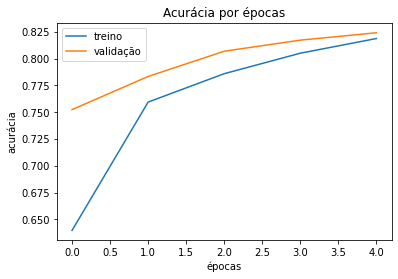

In [20]:
plt.plot(historico2.history['accuracy'])
plt.plot(historico2.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

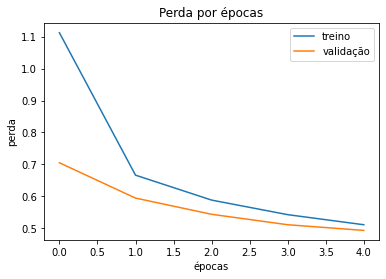

In [21]:
plt.plot(historico2.history['loss'])
plt.plot(historico2.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

## Salvando o modelo

In [ ]:
modelo_salvo = load_model('modelo.h5')